# **Results Overview**

This notebook presents the main results of our study, providing a structured and. We summarize model performance, fairness metrics, and evaluation results across different attributes. The goal is to offer a concise yet comprehensive view of the findings that support our paper.

## **Key Aspects Covered**
- **Reconstruncition of Tables**: Evaluation of different models on fairness and performance metrics
- **Visualizations**: Plots highlighting critical insights.

The results presented here serve as the foundation for our conclusions, helping to interpret model behavior and fairness implications.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
import seaborn as sns
import ast

## Tables

### Table 1

In [7]:
# Load the CSV file
data = pd.read_csv('./notebook/eval_clip_lp.csv')

# Extract values from the CSV file
overall_auc = float(data.loc[data['Unnamed: 0'] == 'overall_auc', 'Value'].values[0])
eval_es_auc = ast.literal_eval(data.loc[data['Unnamed: 0'] == 'eval_es_auc', 'Value'].values[0])
eval_aucs_by_attrs = ast.literal_eval(data.loc[data['Unnamed: 0'] == 'eval_aucs_by_attrs', 'Value'].values[0])
eval_dpds = ast.literal_eval(data.loc[data['Unnamed: 0'] == 'eval_dpds', 'Value'].values[0])
eval_eods = ast.literal_eval(data.loc[data['Unnamed: 0'] == 'eval_eods', 'Value'].values[0])

# Define attribute names and their respective groups
attributes = ["Race", "Gender", "Ethnicity", "Language"]
group_names = [
    ["1st Group AUC", "2nd Group AUC", "3rd Group AUC"],  # Race
    ["1st Group AUC", "2nd Group AUC"],                   # Gender
    ["1st Group AUC", "2nd Group AUC"],                   # Ethnicity
    ["1st Group AUC", "2nd Group AUC", "3rd Group AUC"]   # Language
]

# Create the structured DataFrame
structured_data = []
for i, attr in enumerate(attributes):
    row = {
        "Attribute": attr,
        "DPD ↓": f"{eval_dpds[i] * 100:.2f}",
        "DEOdds ↓": f"{eval_eods[i] * 100:.2f}",
        "AUC ↑": f"{overall_auc * 100:.2f}",
        "ES-AUC ↑": f"{eval_es_auc[i] * 100:.2f}"
    }
    # Add group-wise AUCs dynamically
    for j, group in enumerate(group_names[i]):
        row[group] = f"{eval_aucs_by_attrs[i][j] * 100:.2f}" if j < len(eval_aucs_by_attrs[i]) else "—"
    structured_data.append(row)

# Convert to DataFrame
formatted_df = pd.DataFrame(structured_data)

# Apply styling
table = (
    formatted_df.style
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {"selector": "thead", "props": [("background-color", "#4CAF50"), ("color", "white"), ("font-weight", "bold")]},
        {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f9f9f9")]},
        {"selector": "tbody tr:nth-child(odd)", "props": [("background-color", "#ffffff")]},
        {"selector": "tbody td", "props": [("border", "1px solid #ddd")]},
        {"selector": "th", "props": [("border", "1px solid #ddd"), ("padding", "8px")]},
        {"selector": "td", "props": [("padding", "8px")]}
    ])
    .set_caption("Table 1: CLIP (L/14) evaluated with linear probing")
)

# Display the styled table
display(table)

data_ft = pd.read_csv('./notebook/eval_clip_lp_ft.csv')

# Extract values from the CSV file
overall_auc = float(data_ft.loc[data_ft['Unnamed: 0'] == 'overall_auc', 'Value'].values[0])
eval_es_auc = ast.literal_eval(data_ft.loc[data_ft['Unnamed: 0'] == 'eval_es_auc', 'Value'].values[0])
eval_aucs_by_attrs = ast.literal_eval(data_ft.loc[data_ft['Unnamed: 0'] == 'eval_aucs_by_attrs', 'Value'].values[0])
eval_dpds = ast.literal_eval(data_ft.loc[data_ft['Unnamed: 0'] == 'eval_dpds', 'Value'].values[0])
eval_eods = ast.literal_eval(data_ft.loc[data_ft['Unnamed: 0'] == 'eval_eods', 'Value'].values[0])

# Define attribute names and their respective groups
attributes = ["Race", "Gender", "Ethnicity", "Language"]
group_names = [
    ["1st Group AUC", "2nd Group AUC", "3rd Group AUC"],  # Race
    ["1st Group AUC", "2nd Group AUC"],                   # Gender
    ["1st Group AUC", "2nd Group AUC"],                   # Ethnicity
    ["1st Group AUC", "2nd Group AUC", "3rd Group AUC"]   # Language
]

# Create the structured DataFrame
structured_data_ft = []
for i, attr in enumerate(attributes):
    row = {
        "Attribute": attr,
        "DPD ↓": f"{eval_dpds[i] * 100:.2f}",
        "DEOdds ↓": f"{eval_eods[i] * 100:.2f}",
        "AUC ↑": f"{overall_auc * 100:.2f}",
        "ES-AUC ↑": f"{eval_es_auc[i] * 100:.2f}"
    }
    # Add group-wise AUCs dynamically
    for j, group in enumerate(group_names[i]):
        row[group] = f"{eval_aucs_by_attrs[i][j] * 100:.2f}" if j < len(eval_aucs_by_attrs[i]) else "—"
    structured_data_ft.append(row)

# Convert to DataFrame
formatted_df_ft = pd.DataFrame(structured_data_ft)

# Apply styling
ft_styled_table = (
    formatted_df_ft.style
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {"selector": "thead", "props": [("background-color", "#4CAF50"), ("color", "white"), ("font-weight", "bold")]},
        {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f9f9f9")]},
        {"selector": "tbody tr:nth-child(odd)", "props": [("background-color", "#ffffff")]},
        {"selector": "tbody td", "props": [("border", "1px solid #ddd")]},
        {"selector": "th", "props": [("border", "1px solid #ddd"), ("padding", "8px")]},
        {"selector": "td", "props": [("padding", "8px")]}
    ])
    .set_caption("Table 1: Pre-Trained CLIP (L/14) evaluated with linear probing")
)

# Display the styled table
display(ft_styled_table)

import pandas as pd

# Define the attributes and groups
attributes = {
    "Race": {
        "Groups": ["Asian", "Black", "White"]
    },
    "Gender": {
        "Groups": ["Female", "Male"]
    },
    "Ethnicity": {
        "Groups": ["Non-Hispanic", "Hispanic"]
    },
    "Language": {
        "Groups": ["English", "Spanish", "Other"]
    }
}

# Create the table structure
table_att = []
for attr, cols in attributes.items():
    row = {
        "Attribute": attr,
        "1st Group Name": cols["Groups"][0] if len(cols["Groups"]) > 0 else None,
        "2nd Group Name": cols["Groups"][1] if len(cols["Groups"]) > 1 else None,
        "3rd Group Name": cols["Groups"][2] if len(cols["Groups"]) > 2 else None
    }
    table_att.append(row)

# Convert to DataFrame
group_names_df = pd.DataFrame(table_att)

# Apply styling
styled_group_names_df = group_names_df.style.set_properties(**{
    'border': '1px solid #ddd',
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'thead th',
    'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]
}, {
    'selector': 'tbody tr:nth-child(even)',
    'props': [('background-color', '#f9f9f9')]
}, {
    'selector': 'tbody tr:nth-child(odd)',
    'props': [('background-color', '#ffffff')]
}]).set_caption("Group Names by Attribute")

# Display the styled table
styled_group_names_df


,Attribute,DPD ↓,DEOdds ↓,AUC ↑,ES-AUC ↑,1st Group AUC,2nd Group AUC,3rd Group AUC
0,Race,5.72,16.31,77.21,72.74,79.75,74.08,77.67
1,Gender,0.67,5.67,77.21,72.46,74.21,80.77,nan
2,Ethnicity,18.94,17.75,77.21,71.56,77.44,69.55,nan
3,Language,15.12,34.19,77.21,70.46,77.19,84.09,74.53


,Attribute,DPD ↓,DEOdds ↓,AUC ↑,ES-AUC ↑,1st Group AUC,2nd Group AUC,3rd Group AUC
0,Race,4.35,9.45,79.09,75.66,79.72,75.93,79.83
1,Gender,0.96,6.50,79.09,74.93,76.57,82.11,nan
2,Ethnicity,11.75,17.03,79.09,75.64,79.32,74.76,nan
3,Language,13.80,15.05,79.09,72.44,79.49,79.55,70.77


,Attribute,1st Group Name,2nd Group Name,3rd Group Name
0,Race,Asian,Black,White
1,Gender,Female,Male,None
2,Ethnicity,Non-Hispanic,Hispanic,None
3,Language,English,Spanish,Other


### Table 2

In [9]:
# Define the correct attribute mappimport pandas as pd

def create_metrics_table(file_path, caption="Formatted Metrics Table"):
    """
    Reads a CSV file and creates a formatted metrics table.

    Parameters:
    file_path (str): Path to the CSV file.
    caption (str): Caption to display above the table.

    Returns:
    pandas.io.formats.style.Styler: Styled DataFrame with metrics.
    """
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Clean column names by stripping spaces
    df.columns = df.columns.str.strip()

    # Extract the first row for baseline metrics
    first_row = df.iloc[0]

    # Define the correct attribute mappings based on the actual column names
    attributes = {
        "Race": {
            "DPD": "dpd_attr0",
            "DEODDs": "eod_attr0",
            "AUC": "auc",
            "ES-AUC": "esauc_attr0",
            "Group AUC": ["auc_attr0_group0", "auc_attr0_group1", "auc_attr0_group2"],
        },
        "Gender": {
            "DPD": "dpd_attr1",
            "DEODDs": "eod_attr1",
            "AUC": "auc",
            "ES-AUC": "esauc_attr1",
            "Group AUC": ["auc_attr1_group0", "auc_attr1_group1"],
        },
        "Ethnicity": {
            "DPD": "dpd_attr2",
            "DEODDs": "eod_attr2",
            "AUC": "auc",
            "ES-AUC": "esauc_attr2",
            "Group AUC": ["auc_attr2_group0", "auc_attr2_group1"],
        },
        "Language": {
            "DPD": "dpd_attr3",
            "DEODDs": "eod_attr3",
            "AUC": "auc",
            "ES-AUC": "esauc_attr3",
            "Group AUC": ["auc_attr3_group0", "auc_attr3_group1", "auc_attr3_group2"],
        }
    }

    # Create a structured DataFrame for metrics display
    table_data = []
    for attr, cols in attributes.items():
        row = {
            "Attribute": attr,
            "DPD": round(float(first_row[cols["DPD"]]) * 100, 2),
            "DEOdds": round(float(first_row[cols["DEODDs"]]) * 100, 2),
            "AUC": round(float(first_row[cols["AUC"]]) * 100, 2),
            "ES-AUC": round(float(first_row[cols["ES-AUC"]]) * 100, 2),
        }
        # Add Group-wise AUCs
        for i, col in enumerate(cols["Group AUC"]):
            row[f"{i+1}th Group AUC"] = round(float(first_row[col]) * 100, 2) if col in first_row else None
        
        table_data.append(row)

    # Convert to DataFrame
    formatted_df = pd.DataFrame(table_data)

    # Style the DataFrame
    styled_metrics = formatted_df.style.set_table_styles(
        [{'selector': 'thead th',
          'props': [('background-color', '#4CAF50'), ('color', 'white'), ('text-align', 'center')]}]
    ).set_properties(**{
        'border': '1px solid black',
        'padding': '8px'
    }).set_caption(caption).format(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

    return styled_metrics

attributes = {
    "Race": {
        "DPD": "dpd_attr0",
        "DEODDs": "eod_attr0",
        "AUC": "auc",
        "ES-AUC": "esauc_attr0",
        "Group AUC": ["auc_attr0_group0", "auc_attr0_group1", "auc_attr0_group2"],
        "Groups": ["Asian", "Black", "White"]
    },
    "Gender": {
        "DPD": "dpd_attr1",
        "DEODDs": "eod_attr1",
        "AUC": "auc",
        "ES-AUC": "esauc_attr1",
        "Group AUC": ["auc_attr1_group0", "auc_attr1_group1"],
        "Groups": ["Female", "Male"]
    },
    "Ethnicity": {
        "DPD": "dpd_attr2",
        "DEODDs": "eod_attr2",
        "AUC": "auc",
        "ES-AUC": "esauc_attr2",
        "Group AUC": ["auc_attr2_group0", "auc_attr2_group1"],
        "Groups": ["Non-Hispanic", "Hispanic"]
    },
    "Language": {
        "DPD": "dpd_attr3",
        "DEODDs": "eod_attr3",
        "AUC": "auc",
        "ES-AUC": "esauc_attr3",
        "Group AUC": ["auc_attr3_group0", "auc_attr3_group1", "auc_attr3_group2"],
        "Groups": ["English", "Spanish", "Other"]
    }
}


# Create a structured DataFrame for group names display
table_att = []
for attr, cols in attributes.items():
    row = {
        "Attribute": attr,
        "1st Group Name": cols["Groups"][0] if len(cols["Groups"]) > 0 else None,
        "2nd Group Name": cols["Groups"][1] if len(cols["Groups"]) > 1 else None,
        "3rd Group Name": cols["Groups"][2] if len(cols["Groups"]) > 2 else None
    }
    table_att.append(row)

# Convert to DataFrame
group_names_df = pd.DataFrame(table_att)

# Style the group names table
styled_groups = group_names_df.style.set_table_styles(
    [{'selector': 'thead th',
      'props': [('background-color', '#4CAF50'), ('color', 'white'), ('text-align', 'center')]}]
).set_properties(**{
    'border': '1px solid black',
    'padding': '8px'
}).set_caption("Group Names by Attribute Table")


file_path = "./notebook/eval_clip_zs_16.csv"
caption = "Table 2: CLIP (B/16) in a zero-shot setting"
clip_16 = create_metrics_table(file_path, caption)

file_path = "./notebook/eval_clip_zs_14.csv"
caption = "Table 2: CLIP (B/14) in a zero-shot setting"
clip_14 = create_metrics_table(file_path, caption)

file_path = "./notebook/eval_fairclip_l14_race.csv"
caption = "Table 2: FairCLIP (L/14) in a zero-shot setting regularized for race"
fclip_14_r = create_metrics_table(file_path, caption)

file_path = "./notebook/eval_fairclip_l14_gender.csv"
caption = "Table 2: FairCLIP (L/14) in a zero-shot setting regularized for gender"
fclip_14_g = create_metrics_table(file_path, caption)


file_path = "./notebook/eval_fairclip_l14_ethnicity.csv"
caption = "Table 2: FairCLIP (L/14) in a zero-shot setting regularized for ethnicity"
fclip_14_e = create_metrics_table(file_path, caption)

file_path = "./notebook/eval_fairclip_l14_language.csv"
caption = "Table 2: FairCLIP (L/14) in a zero-shot setting regularized for language"
fclip_14_l = create_metrics_table(file_path, caption)

file_path = "./notebook/eval_fairclip_b16_race.csv"
caption = "Table 2: FairCLIP (B/16) in a zero-shot setting regularized for race"
fclip_16_r = create_metrics_table(file_path, caption)

file_path = "./notebook/eval_fairclip_b16_gender.csv"
caption = "Table 2: FairCLIP (B/16) in a zero-shot setting regularized for gender"
fclip_16_g = create_metrics_table(file_path, caption)

file_path = "./notebook/eval_fairclip_b16_ethnicity.csv"
caption = "Table 2: FairCLIP (B/16) in a zero-shot setting regularized for ethnicity"
fclip_16_e = create_metrics_table(file_path, caption)

file_path = "./notebook/eval_fairclip_b16_language.csv"
caption = "Table 2: FairCLIP (B/16) in a zero-shot setting regularized for language"
fclip_16_l = create_metrics_table(file_path, caption)


# Display the tables
display(styled_groups)
display(clip_16)
display(clip_14)
display(fclip_14_r)
display(fclip_14_g)
display(fclip_14_e)
display(fclip_14_l)
display(fclip_16_r)
display(fclip_16_g)
display(fclip_16_e)
display(fclip_16_l)


,Attribute,1st Group Name,2nd Group Name,3rd Group Name
0,Race,Asian,Black,White
1,Gender,Female,Male,None
2,Ethnicity,Non-Hispanic,Hispanic,None
3,Language,English,Spanish,Other


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,17.74,15.47,63.78,58.27,65.71,68.84,61.33
1,Gender,6.26,8.85,63.78,60.53,61.51,66.87,nan
2,Ethnicity,9.38,8.62,63.78,61.62,63.89,60.38,nan
3,Language,11.98,12.14,63.78,60.03,63.67,60.51,60.90


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,16.54,18.99,68.70,63.90,73.67,70.20,67.67
1,Gender,4.91,8.00,68.70,65.15,66.36,71.80,nan
2,Ethnicity,17.33,20.13,68.70,65.66,68.89,64.27,nan
3,Language,13.64,18.48,68.70,63.28,68.81,68.47,60.49


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,16.39,16.45,69.09,62.24,72.87,74.50,67.27
1,Gender,6.07,6.84,69.09,65.62,66.85,72.14,nan
2,Ethnicity,15.49,17.71,69.09,62.17,69.51,58.37,nan
3,Language,11.68,14.47,69.09,58.63,69.38,61.65,58.97


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,20.87,25.02,60.48,57.35,63.71,61.09,58.86
1,Gender,5.25,5.81,60.48,57.54,58.32,63.44,nan
2,Ethnicity,0.18,2.63,60.48,57.80,60.65,56.01,nan
3,Language,12.81,17.93,60.48,55.86,59.92,59.09,66.80


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,23.88,21.47,70.04,64.40,73.86,73.22,68.29
1,Gender,6.61,9.50,70.04,65.69,67.25,73.87,nan
2,Ethnicity,6.73,11.54,70.04,66.64,70.20,65.10,nan
3,Language,27.97,50.22,70.04,63.66,70.01,71.59,61.59


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,17.12,19.51,63.40,59.47,64.42,66.80,61.21
1,Gender,5.48,5.62,63.40,59.41,60.57,67.28,nan
2,Ethnicity,0.18,2.71,63.40,59.05,63.62,56.25,nan
3,Language,12.85,17.60,63.40,60.77,63.11,61.36,61.39


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,1.85,8.19,67.03,60.55,72.69,70.18,65.14
1,Gender,0.16,2.50,67.03,63.17,64.41,70.52,nan
2,Ethnicity,9.93,16.20,67.03,60.69,67.45,57.01,nan
3,Language,3.95,7.96,67.03,54.48,67.25,52.84,58.42


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,17.54,20.97,66.59,60.50,70.20,71.30,64.84
1,Gender,5.12,8.47,66.59,62.85,63.99,69.94,nan
2,Ethnicity,4.76,7.83,66.59,61.42,66.89,58.47,nan
3,Language,14.91,39.69,66.59,52.71,66.81,48.58,58.49


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,6.05,5.09,69.41,65.08,73.58,70.44,67.96
1,Gender,1.74,6.10,69.41,64.65,66.19,73.56,nan
2,Ethnicity,8.37,11.44,69.41,62.76,69.79,59.20,nan
3,Language,5.78,8.98,69.41,58.18,69.37,58.52,61.04


,Attribute,DPD,DEOdds,AUC,ES-AUC,1th Group AUC,2th Group AUC,3th Group AUC
0,Race,10.39,10.70,67.38,65.58,69.50,67.45,66.82
1,Gender,1.73,3.54,67.38,64.78,65.61,69.62,nan
2,Ethnicity,9.37,15.19,67.38,62.71,67.64,60.21,nan
3,Language,10.25,16.42,67.38,52.70,67.65,48.58,58.59


## Figures

### Figure 1

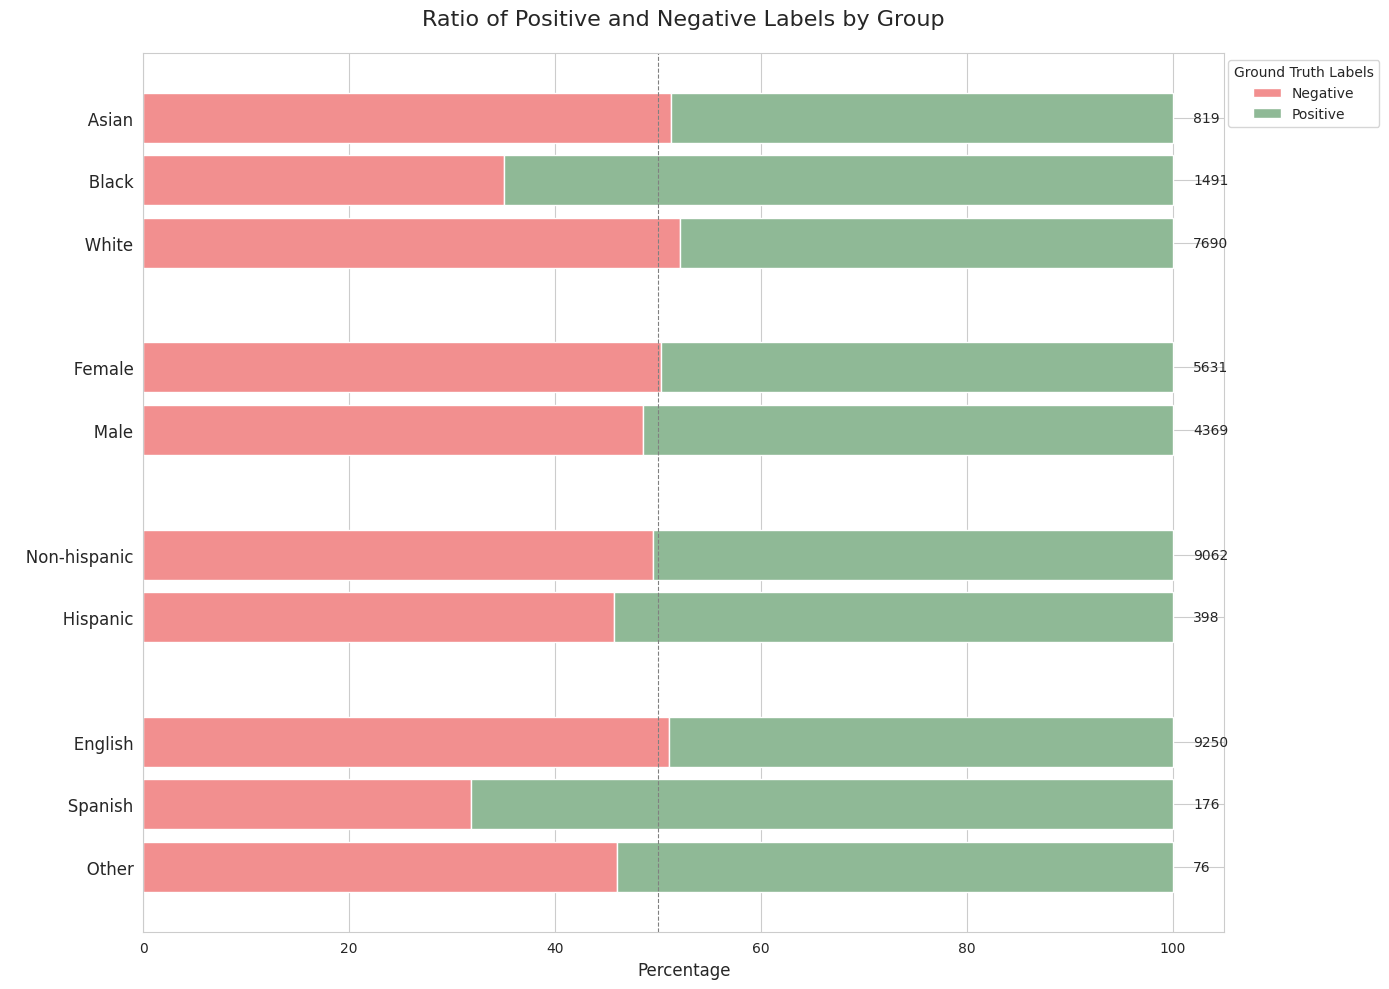

In [14]:

# Load the CSV file
file_path = "notebook/data_plot.csv"
df = pd.read_csv(file_path)

# Define the attribute groups in the desired order (RACE first, LANGUAGE last)
attribute_groups = {
    "RACE": ["Asian", "Black", "White"],
    "GENDER": ["Female", "Male"],
    "ETHNICITY": ["Non-Hispanic", "Hispanic"],
    "LANGUAGE": ["English", "Spanish", "Other"]
}

# Prepare data for plotting
plot_data = []
for group, attributes in attribute_groups.items():
    for attribute in attributes:
        # Filter the data for the specific attribute and split "all"
        sub_df = df[(df["attributes"].str.lower() ==
                     attribute.lower()) & (df["split"] == "all")]
        if not sub_df.empty:
            # Extract the positive, negative percentages and absolute count
            positive = sub_df["Percentage Positive"].values[0]
            negative = sub_df["Percentage Negative"].values[0]
            count = sub_df["Absolute Number"].values[0]
            plot_data.append((group, attribute, positive, negative, count))

# Convert plot data to a DataFrame
plot_df = pd.DataFrame(plot_data, columns=[
    "Group", "Attribute", "Positive", "Negative", "Count"
])

# Debug: Check if plot_df is empty or mismatched
if plot_df.empty:
    raise ValueError(
        "No data available for plotting. Check the CSV file contents.")

# Set up the figure
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 10))

# Prepare y-axis positions
y_positions = []
attribute_positions = []
group_annotations = []
current_position = 0
spacing = 1  # Space between groups

for group, attributes in attribute_groups.items():
    # Centered group label
    group_annotations.append(
        (group, current_position + len(attributes) / 2 - 0.5))
    for attribute in attributes:
        y_positions.append(current_position)
        attribute_positions.append(current_position)
        current_position += 1
    current_position += spacing  # Add space after each group

# Check alignment
if len(attribute_positions) != len(plot_df):
    raise ValueError(
        "Mismatch between attribute_positions and plot_df rows. Check input data."
    )

# Create horizontal bars (Negative first, Positive stacked on top)
ax.barh(attribute_positions, plot_df["Negative"], color='#F28F8F',
        label="Negative", height=0.8)
ax.barh(attribute_positions, plot_df["Positive"], left=plot_df["Negative"],
        color='#8FB996', label="Positive", height=0.8)

# Add counts at the end of each bar
for i, count in enumerate(plot_df["Count"]):
    ax.text(
        plot_df["Negative"].iloc[i] +
        plot_df["Positive"].iloc[i] + 2,  # end of bar
        attribute_positions[i],
        f"{int(count)}",
        va='center', fontsize=10
    )

# Set y-ticks and labels for attributes
ax.set_yticks(y_positions)
ax.set_yticklabels(
    ["   " + attribute.capitalize() for attribute in plot_df["Attribute"]],
    fontsize=12, rotation=0
)

# Add group labels to the left of the y-axis
for group, position in group_annotations:
    ax.annotate(group,
                xy=(-10, position),
                xytext=(-50, 0),
                textcoords='offset points',
                ha='right', va='center',
                fontsize=12, fontweight='bold')

# Add a vertical reference line at 50%
ax.axvline(50, color='gray', linestyle='--', linewidth=0.8)

# Titles and labels
ax.set_title("Ratio of Positive and Negative Labels by Group",
             fontsize=16, pad=20)
ax.set_xlabel("Percentage", fontsize=12)

# Invert the y-axis so that the first group (RACE) appears at the top
ax.invert_yaxis()

# Adjust legend position
ax.legend(title="Ground Truth Labels", fontsize=10,
          loc='upper right', bbox_to_anchor=(1.15, 1))

# Adjust layout for spacing
plt.tight_layout()

# Save and display the plot
plt.savefig("hierarchical_barplot_final.png", dpi=300)
plt.show()
